<a href="https://colab.research.google.com/github/akhil1198/RL-PA1/blob/main/RL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

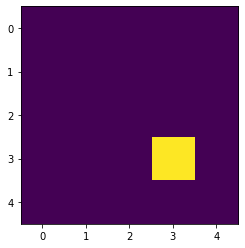

<IPython.core.display.Javascript object>

In [14]:
output_grid = widgets.Grid(1,1)

for _ in range(5):
  grid = np.zeros((5, 5))
  grid[np.random.randint(5), np.random.randint(5)] = 1

  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(2) 

Creating an Environment with all the actions, states, rewards and positions

In [40]:
from IPython.utils.path import random
class GridEnv(gym.Env):
  def __init__(self, env_type):
    self.environment_type = env_type
    self.environment_width = 5
    self.environment_height = 5
    self.observation_space = spaces.Discrete(25)
    self.action_space = spaces.Discrete(4)

    self.timestep = 0
    self.max_timesteps = 15

    self.agent_pos = [0, 0]
    self.goal_pos = [4, 4]

    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5

    self.reward = 0
    self.truncated = False
    self.terminated = False
    self.reward_pos = np.asarray([[0, 4], [2, 1], [3, 4], [4, 2]])
    self.negreward_pos = np.asarray([[1, 2], [3, 0], [3, 3]])

    #for stochastic env
    self.random_number = 0
    self.rand_action = 0

  def reset(self):
    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    info = {}

    return observation, info
  
  def step(self, action, obs):
    #print(action)
    action = int(action)
    if action == 0:
      #print("at 0 - > agent_pos[0] += 1")
      self.agent_pos[0] += 1
    if action == 1:
      #print("at 1 -> agent_pos[0] -= 1")
      self.agent_pos[0] -= 1
    if action == 2:
      #print("at 2 -> agent_pos[1] += 1")
      self.agent_pos[1] += 1
    if action == 3:
      #print("at 3 -> agent_pos[1] -= 1")
      self.agent_pos[1] -= 1
    #stochastic method
    if self.environment_type == "stochastic":
      self.random_number = np.random.rand()
      self.rand_action = np.random.randint(4)
      if self.random_number < 0.9:
        #print("Executing the right action -> ", action)
        if action == 0:
          #print("at 0 - > agent_pos[0] += 1")
          self.agent_pos[0] += 1
        if action == 1:
          #print("at 1 -> agent_pos[0] -= 1")
          self.agent_pos[0] -= 1
        if action == 2:
          #print("at 2 -> agent_pos[1] += 1")
          self.agent_pos[1] += 1
        if action == 3:
          #print("at 3 -> agent_pos[1] -= 1")
          self.agent_pos[1] -= 1
      elif self.random_number > 0.9:
        #print("Executing Random Action", self.rand_action)
        if self.rand_action == 0:
          self.agent_pos[0] += 1
        if self.rand_action == 1:
          self.agent_pos[0] -= 1
        if self.rand_action == 2:
          self.agent_pos[1] += 1
        if self.rand_action == 3:
          self.agent_pos[1] -= 1
      
    #print(self.agent_pos)
    #Comment this to demonstrate the truncation condition.
    self.agent_pos = np.clip(self.agent_pos, 0, 4)

    self.state = np.zeros((5,5))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    reward = 0
    #[0, 4], [2, 1], [3, 4], [4, 2]
    if np.array_equal(self.agent_pos, self.reward_pos[0]):
      reward = reward + 2
    
    if np.array_equal(self.agent_pos, self.reward_pos[1]):
      reward = reward + 4
    
    if np.array_equal(self.agent_pos, self.reward_pos[2]):
      reward = reward + 8
    
    if np.array_equal(self.agent_pos, self.reward_pos[3]):
      reward = reward + 6
    

    if np.array_equal(self.agent_pos, self.goal_pos):
      reward += 100
    

    #[1, 2], [3, 0], [3, 3]
    if np.array_equal(self.agent_pos, self.negreward_pos[0]):
      reward = reward - 5
    
    if np.array_equal(self.agent_pos, self.negreward_pos[1]):
      reward = reward - 6
    
    if np.array_equal(self.agent_pos, self.negreward_pos[2]):
      reward = reward - 2 

    self.timestep += 1

    #print("truncated -> ", self.agent_pos,)
    terminated = True if self.timestep >= self.max_timesteps else False
    truncated = True if np.all((self.agent_pos[0] >= 0) & (self.agent_pos[0] <= 4) & (self.agent_pos[1] >= 0) & (self.agent_pos[1] <= 4)) else False

    info = {}
    
    return observation, reward, terminated, truncated, info

  def render(self):
    print("Environment Type -> ", self.environment_type)
    
    if self.environment_type == 'stochastic':
      print("Random Number -> ", self.random_number)
      print("Random Action -> ", self.rand_action)
      print("Reward -> ", self.reward)
      print("Truncated -> ", self.truncated)
      print("Terminated -> ", self.terminated)
      print("Agent Position -> ", self.agent_pos)
    else: 
      print("Reward -> ", self.reward)
      print("Action -> ", action)
      print("Truncated -> ", self.truncated)
      print("Terminated -> ", self.terminated)
      print("Agent Position -> ", self.agent_pos)
    plt.imshow(self.state)
    


Creating a Random Agent 

In [41]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  def step(self, obs):
    return np.random.choice(self.action_space.n)
  

Starting the execution by calling all the methods in the Environment until termination of process

Deterministic Environment: 

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Environment Type ->  deterministic
Reward ->  0
Action ->  1
Truncated ->  False
Terminated ->  False
Agent Position ->  [3 2]


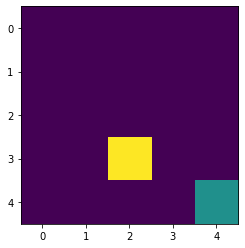

<IPython.core.display.Javascript object>

In [42]:
env = GridEnv(env_type = "deterministic")
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  #action = input()
  observation, reward, terminated, truncated, info = env.step(action, obs)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
    env.render()
  time.sleep(1)


************************************************************************
Stochastic Environment: 

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Environment Type ->  stochastic
Random Number ->  0.14952696329931126
Random Action ->  0
Reward ->  0
Truncated ->  False
Terminated ->  False
Agent Position ->  [2 4]


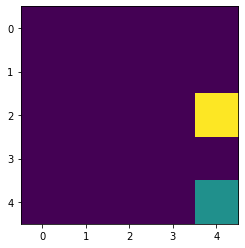

<IPython.core.display.Javascript object>

In [43]:
env = GridEnv(env_type = "stochastic")
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  #action = input()
  observation, reward, terminated, truncated, info = env.step(action, obs)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
    env.render()
  time.sleep(1)